In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [28]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2


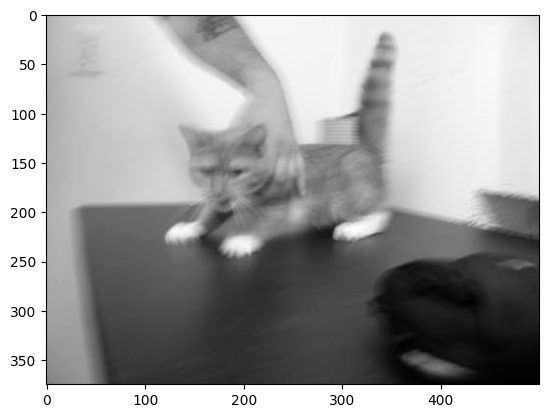

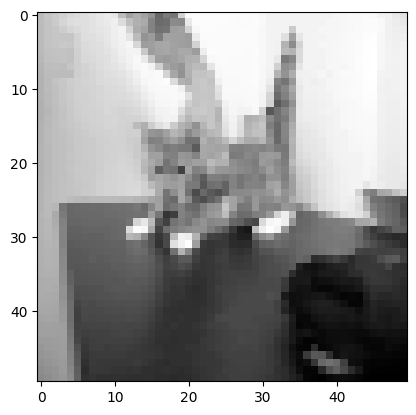

24946


In [9]:

DATADITR = r'C:\Users\vales\OneDrive\Escritorio\kagglecatsanddogs_5340 (1)\PetImages'
CATEGORIES = ['Cat', 'Dog']

for category in CATEGORIES:
    path = os.path.join(DATADITR, category) #path to cats or dogs dir
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

IMG_SIZE = 50

new_array =  cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

training_data = []

def creating_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADITR, category) #path to cats or dogs dir
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array =  cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

creating_training_data()
print(len(training_data))
    

In [12]:
import random

random.shuffle(training_data)

for sample in training_data[:10]:
    print(sample[1])

1
1
1
0
0
1
1
0
0
0


In [13]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)
    
X =  np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [16]:
import pickle

filepath_X = 'C:/Users/vales/OneDrive/Escritorio/X.pickle'
filepath_y = 'C:/Users/vales/OneDrive/Escritorio/y.pickle'

# Guardar los datos
with open(filepath_X, 'wb') as f:
    pickle.dump(X, f)

with open(filepath_y, 'wb') as f:
    pickle.dump(y, f)

In [18]:
# Cargar los datos en otra sesión/script
with open(filepath_X, 'rb') as f:
    X_loaded = pickle.load(f)

with open(filepath_y, 'rb') as f:
    y_loaded = pickle.load(f)

In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D

X = pickle.load(open(filepath_X, 'rb'))
y = pickle.load(open(filepath_y, 'rb'))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

X = X/255.0

model = Sequential()
model.add(Conv2D(64, (3,3), input_shape =  X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss = 'binary_crossentropy',
              optimizer = "adam",
              metrics = ['accuracy'])

model.fit(X, y, batch_size = 32, epochs=10, validation_split = 0.1)


c:\Users\vales\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.5622 - loss: 0.6850 - val_accuracy: 0.7002 - val_loss: 0.5947
Epoch 2/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.6945 - loss: 0.5867 - val_accuracy: 0.7371 - val_loss: 0.5380
Epoch 3/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.7400 - loss: 0.5278 - val_accuracy: 0.7579 - val_loss: 0.5113
Epoch 4/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.7614 - loss: 0.4982 - val_accuracy: 0.7788 - val_loss: 0.4767
Epoch 5/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 19s 28ms/step - accuracy: 0.7778 - loss: 0.4680 - val_accuracy: 0.7735 - val_loss: 0.4831
Epoch 6/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 22s 32ms/step - accuracy: 0.7930 - loss: 0.4494 - val_accuracy: 0.7731 - val_loss: 0.4734
Epoch 7/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.7968 - loss: 0.4397 - val_accuracy: 0.7551 - val_loss: 0.5080
Epoch 8/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 22s 32ms/step - accuracy: 0.8042 - loss: 0.4283 - 

780/780 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step


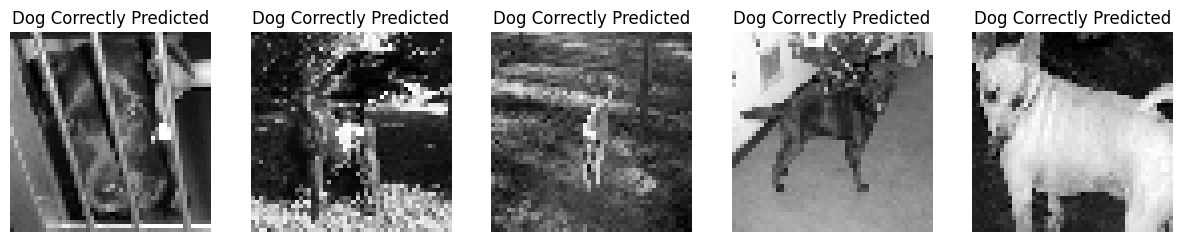

In [41]:
# Predicción en el conjunto de datos
predictions = model.predict(X)
predicted_classes = (predictions > 0.5).astype("int32")

# Encuentra los índices donde las predicciones son correctas y la etiqueta es 1 (perros)
correct_dog_indices = np.where((predicted_classes.flatten() == y) & (y == 1))[0]

# Mostrar algunas de las imágenes correctas de perros
fig, axes = plt.subplots(nrows=1, ncols=min(5, len(correct_dog_indices)), figsize=(15, 3))
for ax, idx in zip(axes, correct_dog_indices[:5]):
    ax.imshow(X[idx].reshape(IMG_SIZE, IMG_SIZE), cmap='gray')
    ax.title.set_text("Dog Correctly Predicted")
    ax.axis('off')
plt.show()

780/780 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step


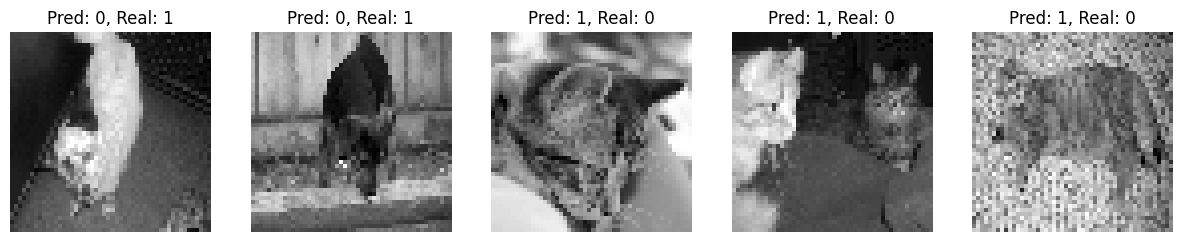

In [40]:
# Predicción en el conjunto de datos
predictions = model.predict(X)
predicted_classes = (predictions > 0.5).astype("int32")

# Encuentra los índices de las predicciones incorrectas
incorrect_indices = np.where(predicted_classes.flatten() != y)[0]

# Mostrar algunas de las imágenes mal predichas
fig, axes = plt.subplots(nrows=1, ncols=min(5, len(incorrect_indices)), figsize=(15, 3))
for ax, idx in zip(axes, incorrect_indices[:5]):
    ax.imshow(X[idx].reshape(IMG_SIZE, IMG_SIZE), cmap='gray')
    ax.title.set_text(f"Pred: {predicted_classes[idx][0]}, Real: {y[idx]}")
    ax.axis('off')
plt.show()

Epoch 1/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.8291 - loss: 0.3781 - val_accuracy: 0.7884 - val_loss: 0.4604
Epoch 2/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.8366 - loss: 0.3642 - val_accuracy: 0.7960 - val_loss: 0.4747
Epoch 3/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 0.8420 - loss: 0.3532 - val_accuracy: 0.7956 - val_loss: 0.4587
Epoch 4/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.8504 - loss: 0.3390 - val_accuracy: 0.7828 - val_loss: 0.4758
Epoch 5/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.8562 - loss: 0.3242 - val_accuracy: 0.8032 - val_loss: 0.4497
Epoch 6/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 22s 31ms/step - accuracy: 0.8673 - loss: 0.3157 - val_accuracy: 0.8012 - val_loss: 0.4649
Epoch 7/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.8721 - loss: 0.3014 - val_accuracy: 0.8000 - val_loss: 0.4838
Epoch 8/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 22s 32ms/step - accuracy: 0.8698 - loss: 0.2993 - 

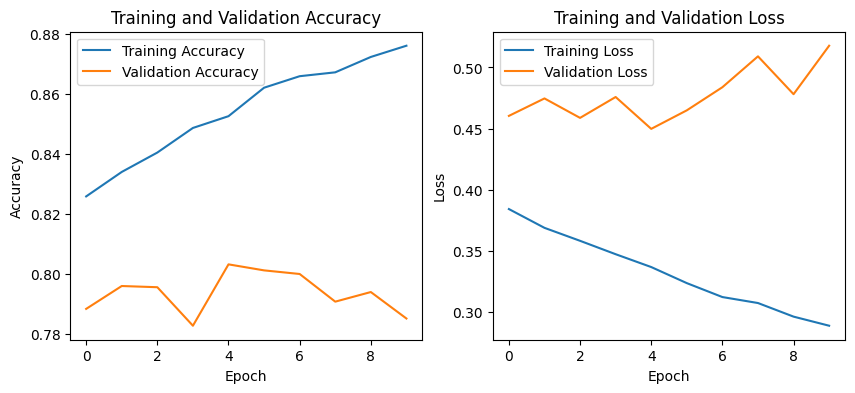

In [43]:
# Asumiendo que model.fit se ha ejecutado y los resultados están en la variable 'history'
history = model.fit(X, y, batch_size=32, epochs=10, validation_split=0.1)

# Accediendo a los datos del historial
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Creando la gráfica de accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Creando la gráfica de loss
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()